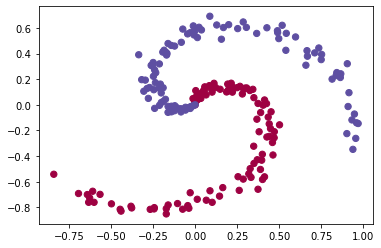

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
yc = np.zeros((N*K,2))
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    if j == 0:
        yc[ix] = np.matrix([[1, 0]])
    else:
        yc[ix] = np.matrix([[0, 1]])
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
k = 2
h = 300
W0 = 0.01 * np.random.randn(D, h)
W1 = 0.01 * np.random.randn(h, k)
b0 = 0.0 * np.random.randn(1, h)
b1 = 0.0 * np.random.randn(1, k)
learning_rate = 1e-4

def tanh(x):
    return 2 / (1 + np.exp(-2*x)) - 1

def tanh_derivative(output):
    """computes the local derivative aka the derivative of what came out of that layer"""
    return 1 - output**2


def sigmoid(x):
     return 1/ (1 + np.exp(-x))
 
def sigmoid_derivative(output):
    """computes the local derivative aka the derivative of what came out of that layer"""
    return output * (1-output)

def relu(x):
    return np.maximum(0.0, x)

def relu_derivative(output):
    output[output <= 0] = 0
    output[output>0] = 1
    return output

for i in range(10000):
    m0 = np.dot(X, W0) 
    mb0 = m0 + b0
    a0 = relu(mb0)
    m1 = np.dot(a0, W1)
    a1 = m1 + b1

    C = np.sum((a1 - yc)**2) / 2*N
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, C))


    dCda1 = 2 * (a1 - yc)
    da1da0 = W1
    da0dm0 = relu_derivative(mb0)
    dm0dW0 = X
    
    da1dW1 = a0
    
    da1dm1 = 1
    
    tmp1 = np.dot(dCda1, da1da0.T)
    tmp2 = da0dm0 * tmp1
    
    dCdW0 = np.dot(dm0dW0.T, tmp2)
    dCdW1 = np.dot(da1dW1.T, dCda1)
    
    dCdb1 = np.sum(dCda1, axis=0, keepdims=True)
    dCdb0 = np.sum(tmp2, axis=0, keepdims=True)
    
    
    W0 -= learning_rate * dCdW0
    W1 -= learning_rate * dCdW1
    
    b0 -= learning_rate * dCdb0
    b1 -= learning_rate * dCdb1
    
hidden_layer = relu(np.dot(X, W0) + b0)
scores = np.dot(hidden_layer, W1) + b1
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

iteration 0: loss 10006.038996
iteration 1000: loss 2775.651161
iteration 2000: loss 2246.019983
iteration 3000: loss 1479.692685
iteration 4000: loss 1320.806185
iteration 5000: loss 1260.214375
iteration 6000: loss 1178.215722
iteration 7000: loss 1057.143718
iteration 8000: loss 938.039423
iteration 9000: loss 837.728548
training accuracy: 0.96


(-1.8515392815691603, 1.6884607184308429)

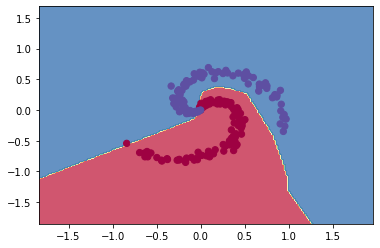

In [7]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W0) + b0), W1) + b1
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())